In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Our goal is to group customers with similar behavior.

# amacimiz Benzer davranan müşterileri aynı gruba koymak.

In [3]:


data = {
    "customer_id": [
        1,2,3,4,5,6,7,8,9,10,
        11,12,13,14,15,16,17,18,19,20,
        21,22,23,24,25,26,27,28,29,30,
        31,32,33,34,35,36,37,38,39,40
    ],
    "age": [
        23,25,22,28,35,38,40,42,29,31,
        50,52,48,55,45,26,27,36,41,53,
        24,26,23,29,34,37,39,43,30,32,
        49,51,47,54,44,27,28,35,42,52
    ],
    "annual_income": [
        25000,27000,24000,30000,48000,52000,50000,54000,32000,35000,
        80000,82000,78000,85000,70000,29000,31000,47000,56000,83000,
        26000,30000,24000,36000,47000,53000,59000,63000,41000,43000,
        74000,77000,71000,81000,67000,33000,35000,49000,62000,78000
    ],
    "spending_score": [
        35,40,30,45,55,60,58,62,48,50,
        75,78,72,80,68,42,44,57,63,77,
        38,43,28,52,59,61,64,69,54,56,
        32,35,34,36,40,47,49,60,66,74
    ],
    "website_visits": [
        4,5,3,6,8,9,7,10,6,7,
        12,13,11,14,10,5,6,8,9,13,
        4,5,3,6,7,8,9,10,6,7,
        11,12,10,13,9,5,6,8,9,12
    ],
    "avg_session_time": [
        3.2,3.5,2.8,4.0,5.2,5.6,5.1,6.0,4.2,4.5,
        7.5,8.0,7.0,8.3,6.8,3.9,4.1,5.0,5.9,7.8,
        3.3,3.6,2.9,4.1,5.0,5.4,5.8,6.2,4.4,4.7,
        7.2,7.6,7.1,7.9,6.6,4.0,4.3,5.3,6.1,7.7
    ]
}

main_df = pd.DataFrame(data)
main_df.head()


,customer_id,age,annual_income,spending_score,website_visits,avg_session_time
0,1,23,25000,35,4,3.2
1,2,25,27000,40,5,3.5
2,3,22,24000,30,3,2.8
3,4,28,30000,45,6,4.0
4,5,35,48000,55,8,5.2


In [4]:
main_df.isna().sum()

customer_id         0
age                 0
annual_income       0
spending_score      0
website_visits      0
avg_session_time    0
dtype: int64

In [5]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       40 non-null     int64  
 1   age               40 non-null     int64  
 2   annual_income     40 non-null     int64  
 3   spending_score    40 non-null     int64  
 4   website_visits    40 non-null     int64  
 5   avg_session_time  40 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 2.0 KB


In [6]:
main_df.describe()

,customer_id,age,annual_income,spending_score,website_visits,avg_session_time
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,20.500000,37.300000,51675.000000,53.400000,8.150000,5.440000
std,11.690452,10.208594,20028.681358,14.609094,2.966047,1.599327
min,1.000000,22.000000,24000.000000,28.000000,3.000000,2.800000
25%,10.750000,28.000000,32750.000000,41.500000,6.000000,4.100000
50%,20.500000,36.500000,49500.000000,54.500000,8.000000,5.250000
75%,30.250000,45.500000,70250.000000,63.250000,10.000000,6.850000
max,40.000000,55.000000,85000.000000,80.000000,14.000000,8.300000


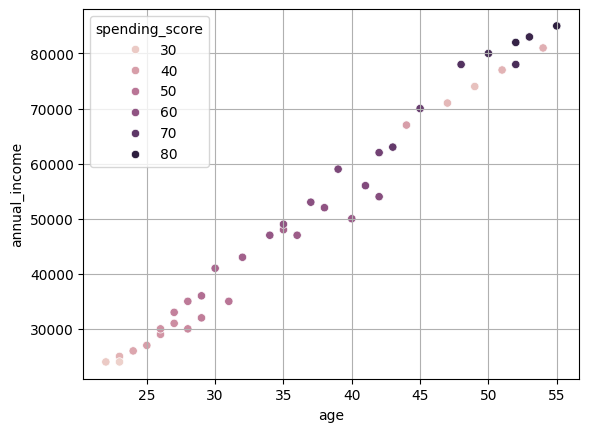

In [10]:
sns.scatterplot(data=main_df,x='age',y='annual_income',hue='spending_score')
plt.grid()


In [11]:
# age and annual income positive relationship
# annual income and spending has i positive relationship 


In [ ]:
# is there any link to session time and spending score

<Axes: xlabel='avg_session_time', ylabel='spending_score'>

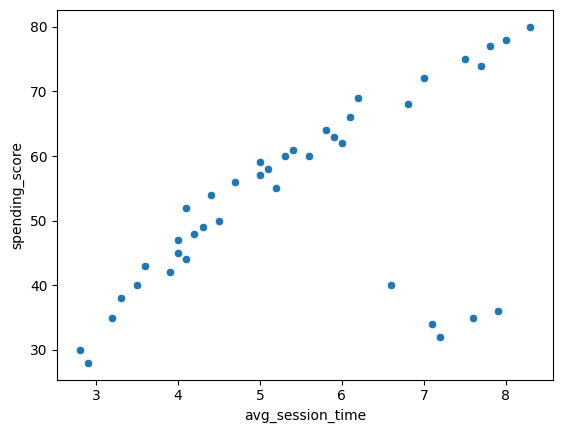

In [13]:
sns.scatterplot(data=main_df,x='avg_session_time',y='spending_score')

<Axes: xlabel='website_visits', ylabel='annual_income'>

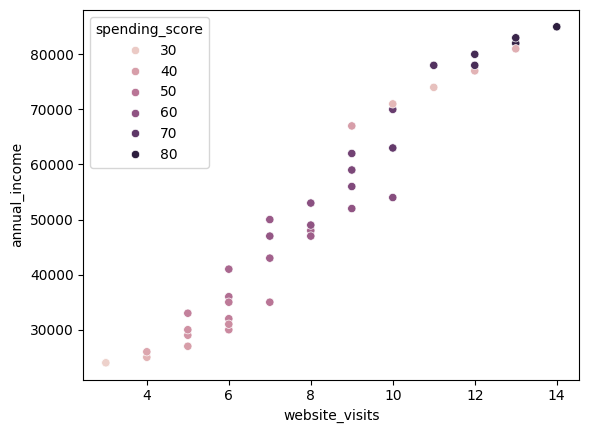

In [ ]:
sns.scatterplot(data=main_df,x='website_visits',y='annual_income',hue='spending_score')

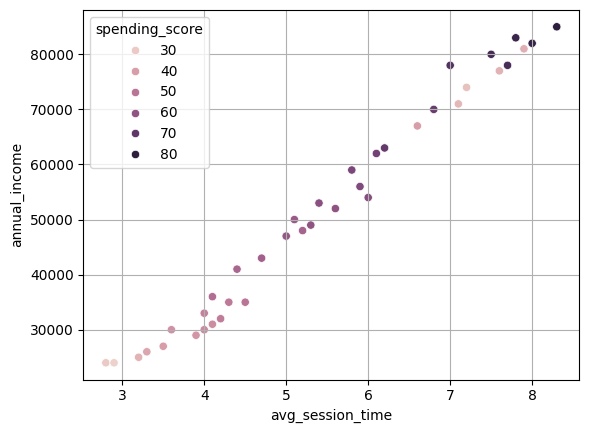

In [33]:
sns.scatterplot(data=main_df,x='avg_session_time',y='annual_income',hue='spending_score')
plt.grid()


In [ ]:
#There is generally a positive relationship between session time and spending, but it is not a perfect straight line.

In [ ]:
# i would like to split cluster to age	annual_income	spending_score	website_visits	avg_session_time

In [14]:
copy_df = main_df[['age','annual_income','spending_score','website_visits','avg_session_time']].copy()

In [16]:
copy_df.head()

,age,annual_income,spending_score,website_visits,avg_session_time
0,23,25000,35,4,3.2
1,25,27000,40,5,3.5
2,22,24000,30,3,2.8
3,28,30000,45,6,4.0
4,35,48000,55,8,5.2


In [17]:
from sklearn.cluster import KMeans

In [ ]:
cluster_k =[]
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=46)
    km.fit(copy_df)
    cluster_k.append(km.inertia_)
# inertia bir ozellik Her noktanın, ait olduğu kümenin merkezine olan uzaklığının kareleri toplamı
# inertia is The total of the squared distances from each point to its cluster center

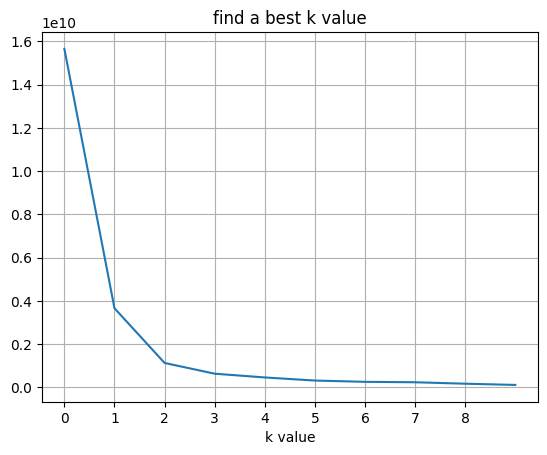

In [ ]:
sns.lineplot(data=cluster_k)
plt.xticks(range(0,9))
plt.title('find a best k value')
plt.xlabel('k value')
plt.grid()
# k=3

In [21]:
cluster_model = KMeans(n_clusters=3)
cluster_model.fit(copy_df)
copy_df['cluster'] = cluster_model.predict(copy_df)

In [23]:
copy_df.head()

,age,annual_income,spending_score,website_visits,avg_session_time,cluster
0,23,25000,35,4,3.2,2
1,25,27000,40,5,3.5,2
2,22,24000,30,3,2.8,2
3,28,30000,45,6,4.0,2
4,35,48000,55,8,5.2,0


<Axes: xlabel='spending_score', ylabel='annual_income'>

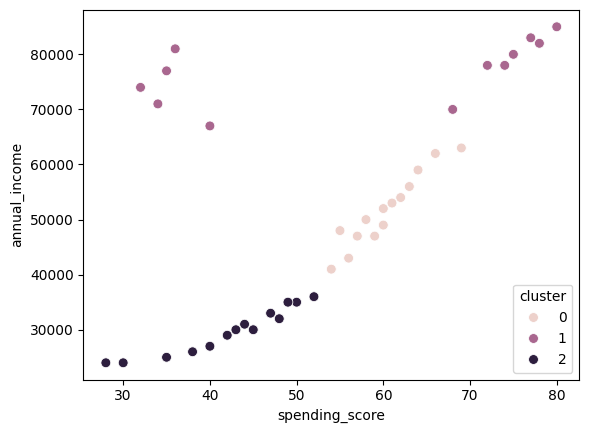

In [47]:
sns.scatterplot(data=copy_df,x='spending_score',y='annual_income',hue='cluster',s=50)

<Axes: xlabel='website_visits', ylabel='annual_income'>

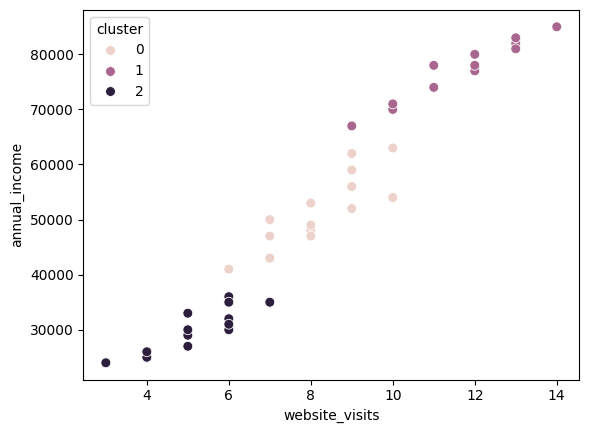

In [49]:
sns.scatterplot(data=copy_df,x='website_visits',y='annual_income',hue='cluster',s=50)

In [ ]:
# #There is generally a positive relationship between session time and spending, but it is not a perfect straight line.
#

<Axes: xlabel='avg_session_time', ylabel='annual_income'>

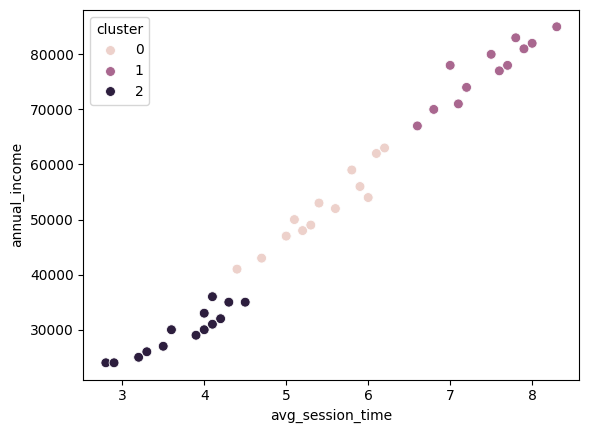

In [50]:
sns.scatterplot(data=copy_df,x='avg_session_time',y='annual_income',hue='cluster',s=50)

<Axes: xlabel='cluster', ylabel='annual_income'>

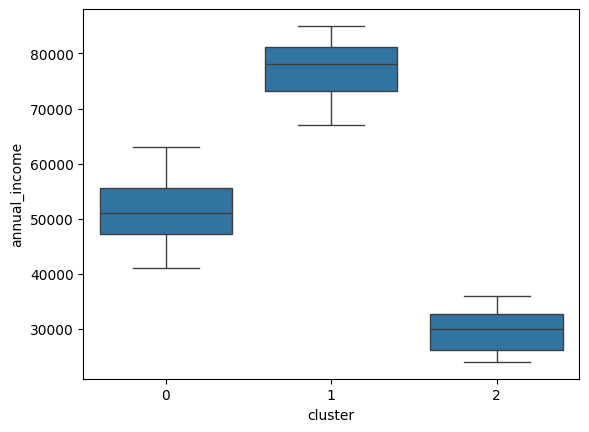

In [58]:
sns.boxplot(data=copy_df,x='cluster',y='annual_income')

<Axes: xlabel='cluster', ylabel='spending_score'>

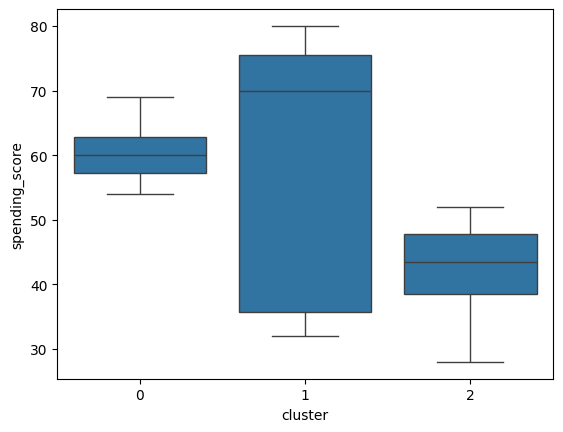

In [ ]:
sns.boxplot(data=copy_df,x='cluster',y='spending_score')
# The chart shows that each cluster has a different spending level,

In [63]:
copy_df.groupby('cluster')['annual_income'].mean()

cluster
0    51714.285714
1    77166.666667
2    29785.714286
Name: annual_income, dtype: float64

In [27]:
copy_df.describe()

,age,annual_income,spending_score,website_visits,avg_session_time,cluster
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,37.300000,51675.000000,53.400000,8.150000,5.440000,1.000000
std,10.208594,20028.681358,14.609094,2.966047,1.599327,0.847319
min,22.000000,24000.000000,28.000000,3.000000,2.800000,0.000000
25%,28.000000,32750.000000,41.500000,6.000000,4.100000,0.000000
50%,36.500000,49500.000000,54.500000,8.000000,5.250000,1.000000
75%,45.500000,70250.000000,63.250000,10.000000,6.850000,2.000000
max,55.000000,85000.000000,80.000000,14.000000,8.300000,2.000000


In [ ]:
# rescale
# describe ->  big std = outlier check mean 
#describe -> big max = log
#mean >> median  AND  max çok uzak

In [ ]:
# age mean(37.300), max(55)
# annual income mean(51675) max(85000)
# spending_income mean(53.4) max(80)
# website_visits  mean (8.1) max(14)
# avg_session mean(5.4) max(8.3)
# there is no extreme outliers 

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [30]:
copy_df1 =main_df.copy()
sc = StandardScaler()
scaled_df = sc.fit_transform(copy_df1)
scaled_df = pd.DataFrame(scaled_df,columns=copy_df1.columns)

In [31]:
scaled_df.head()

,customer_id,age,annual_income,spending_score,website_visits,avg_session_time
0,-1.689278,-1.418626,-1.348807,-1.275535,-1.416993,-1.418432
1,-1.602648,-1.220216,-1.247678,-0.928922,-1.075549,-1.228463
2,-1.516018,-1.517830,-1.399371,-1.622147,-1.758437,-1.671723
3,-1.429389,-0.922603,-1.095985,-0.582309,-0.734105,-0.911849
4,-1.342759,-0.228171,-0.185824,0.110916,-0.051217,-0.151975


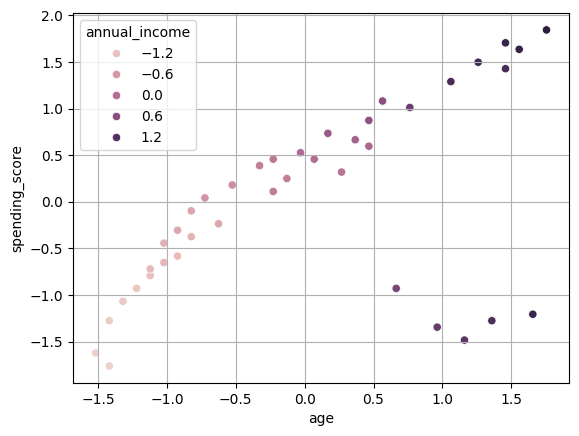

In [51]:
sns.scatterplot(data=scaled_df,x='age',y='spending_score',hue='annual_income')
plt.grid()


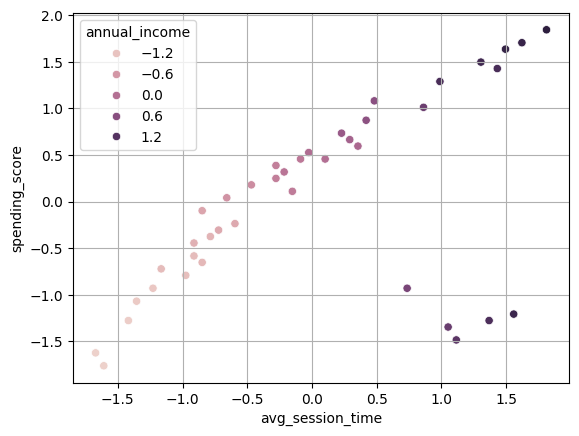

In [52]:
sns.scatterplot(data=scaled_df,x='avg_session_time',y='spending_score',hue='annual_income')
plt.grid()

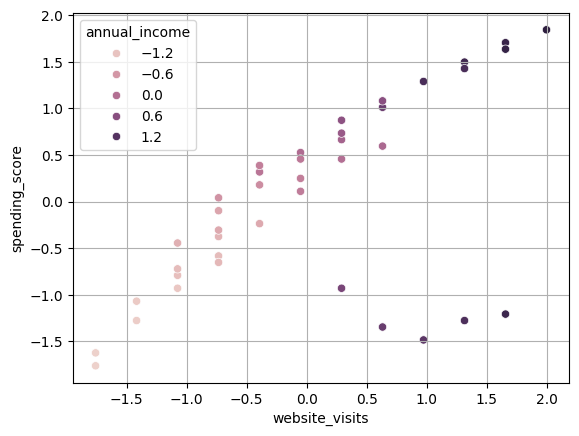

In [54]:
sns.scatterplot(data=scaled_df,x='website_visits',y='spending_score',hue='annual_income')
plt.grid()


In [43]:
cluster_k = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=46)
    km.fit(copy_df1)
    cluster_k.append(km.inertia_)

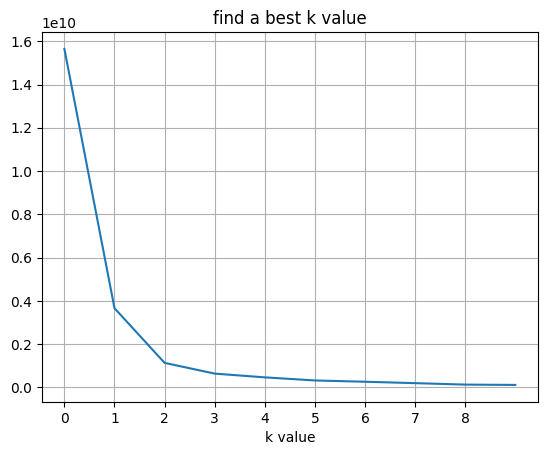

In [ ]:
sns.lineplot(data=cluster_k)
plt.xticks(range(0, 9))
plt.title('find a best k value')
plt.xlabel('k value')
plt.grid()
# k=3 

In [45]:
scaled_cluster_model = KMeans(n_clusters=3)
scaled_cluster_model.fit(scaled_df)
scaled_df['cluster'] =scaled_cluster_model.predict(scaled_df)
scaled_df.head()

,customer_id,age,annual_income,spending_score,website_visits,avg_session_time,cluster
0,-1.689278,-1.418626,-1.348807,-1.275535,-1.416993,-1.418432,2
1,-1.602648,-1.220216,-1.247678,-0.928922,-1.075549,-1.228463,2
2,-1.516018,-1.517830,-1.399371,-1.622147,-1.758437,-1.671723,2
3,-1.429389,-0.922603,-1.095985,-0.582309,-0.734105,-0.911849,2
4,-1.342759,-0.228171,-0.185824,0.110916,-0.051217,-0.151975,1


<Axes: xlabel='cluster', ylabel='annual_income'>

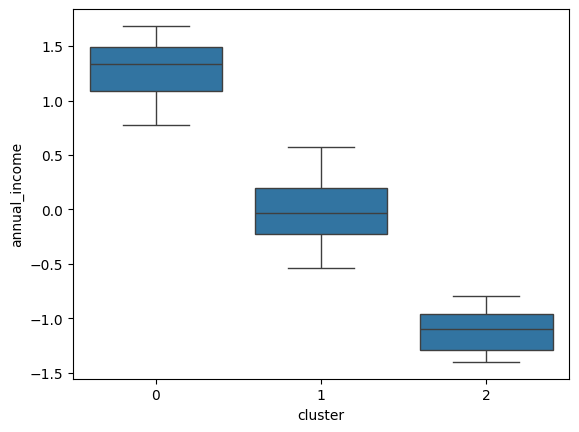

In [ ]:
sns.boxplot(data=scaled_df,x='cluster',y='annual_income')
# Scaling changed the clusters because K-Means now considers all features equally

<Axes: xlabel='cluster', ylabel='spending_score'>

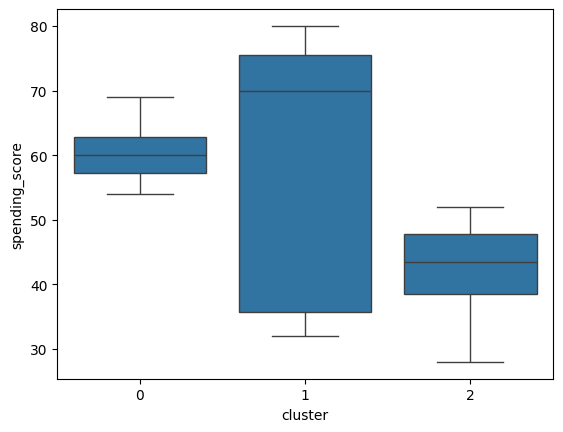

In [61]:
sns.boxplot(data=copy_df,x='cluster',y='spending_score')

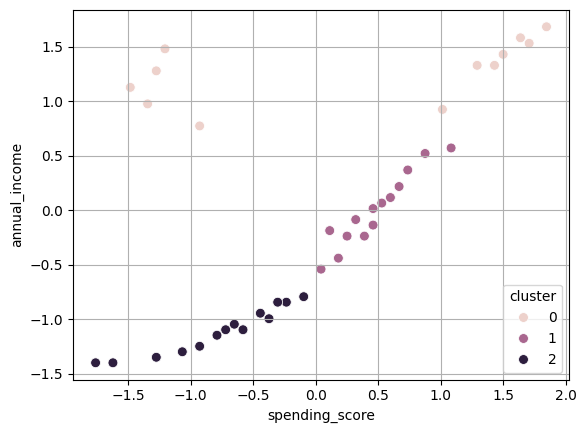

In [56]:
sns.scatterplot(data=scaled_df,x='spending_score',y='annual_income',hue='cluster',s=50)
plt.grid()

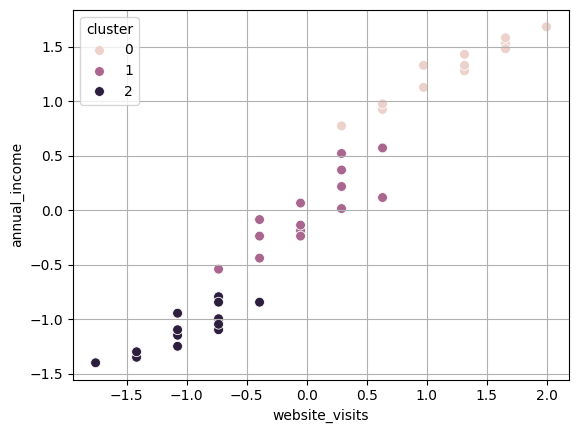

In [ ]:
sns.scatterplot(data=scaled_df,x='website_visits',y='annual_income',hue='cluster',s=50)
plt.grid() 

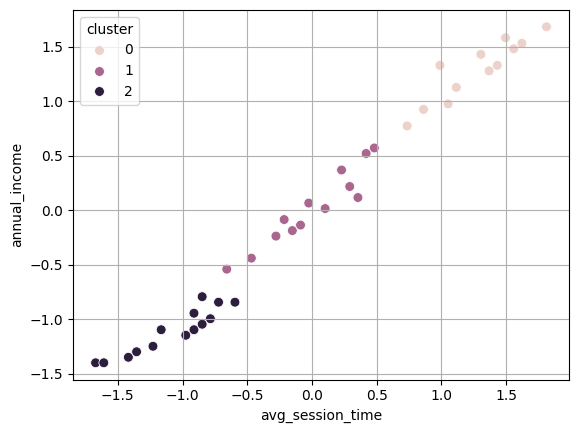

In [68]:
sns.scatterplot(data=scaled_df,x='avg_session_time',y='annual_income',hue='cluster',s=50)
plt.grid() 

In [64]:
scaled_df.groupby('cluster')['annual_income'].mean()

cluster
0    1.288972
1    0.001986
2   -1.106820
Name: annual_income, dtype: float64

In [ ]:
#Cluster numbers can change after scaling because K-Means groups customers differently.

In [66]:
scaled_df.groupby('cluster').mean()

,customer_id,age,annual_income,spending_score,website_visits,avg_session_time
cluster,,,,,,
0,0.317642,1.259898,1.288972,0.347768,1.200745,1.278066
1,0.111381,0.012755,0.001986,0.477335,0.021950,-0.020806
2,-0.383645,-1.092668,-1.106820,-0.775422,-1.051160,-1.074679


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
train_df,test_df = train_test_split(main_df,random_state=46)


In [71]:
train_df.head()

,customer_id,age,annual_income,spending_score,website_visits,avg_session_time
26,27,39,59000,64,9,5.8
13,14,55,85000,80,14,8.3
14,15,45,70000,68,10,6.8
1,2,25,27000,40,5,3.5
12,13,48,78000,72,11,7.0


In [72]:
test_df.head()

,customer_id,age,annual_income,spending_score,website_visits,avg_session_time
3,4,28,30000,45,6,4.0
38,39,42,62000,66,9,6.1
6,7,40,50000,58,7,5.1
4,5,35,48000,55,8,5.2
17,18,36,47000,57,8,5.0


In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 26 to 5
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       30 non-null     int64  
 1   age               30 non-null     int64  
 2   annual_income     30 non-null     int64  
 3   spending_score    30 non-null     int64  
 4   website_visits    30 non-null     int64  
 5   avg_session_time  30 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 1.6 KB


In [74]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 3 to 30
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10 non-null     int64  
 1   age               10 non-null     int64  
 2   annual_income     10 non-null     int64  
 3   spending_score    10 non-null     int64  
 4   website_visits    10 non-null     int64  
 5   avg_session_time  10 non-null     float64
dtypes: float64(1), int64(5)
memory usage: 560.0 bytes


In [78]:
x_train = train_df.drop(columns=['annual_income'])
y_train = train_df['annual_income']
x_test = test_df.drop(columns=['annual_income'])
y_test = test_df['annual_income']

In [80]:
ss= StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_train_ss = pd.DataFrame(x_train_ss,columns=x_train.columns)

In [81]:
x_train_ss.head()

,customer_id,age,spending_score,website_visits,avg_session_time
0,0.509970,0.262547,0.806388,0.363600,0.295075
1,-0.710204,1.780888,1.887579,1.967718,1.800562
2,-0.616345,0.831924,1.076686,0.684423,0.897270
3,-1.836519,-1.066002,-0.815398,-0.919694,-1.089973
4,-0.804064,1.116613,1.346984,1.005247,1.017709


In [82]:
x_test_ss = ss.fit_transform(x_test)
x_test_ss = pd.DataFrame(x_test_ss,columns=x_test.columns)

In [83]:
x_test_ss.head()

,customer_id,age,spending_score,website_visits,avg_session_time
0,-0.994617,-1.618471,-0.999091,-1.46385,-1.494139
1,1.622796,0.194216,0.692918,0.00000,0.220447
2,-0.770267,-0.064739,0.048343,-0.97590,-0.596023
3,-0.919833,-0.712127,-0.193372,-0.48795,-0.514376
4,0.052348,-0.582649,-0.032229,-0.48795,-0.677670


In [84]:
#After scaling the data, we rechecked the number of clusters
cluster_k =[]
for i in range(1,15):
    km = KMeans(n_clusters=i,random_state=46)
    km.fit(train_df)
    cluster_k.append(km.inertia_)
    

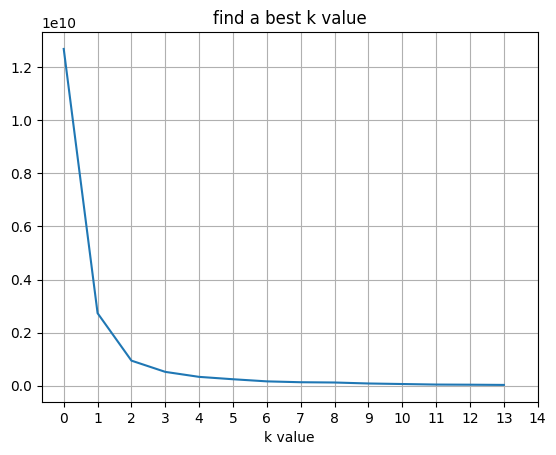

In [ ]:
sns.lineplot(data=cluster_k)
plt.xticks(range(0, 15))
plt.title('find a best k value')
plt.xlabel('k value')
plt.grid()
#k=3

In [87]:
cluster_model = KMeans(n_clusters=3)
cluster_model.fit(x_train_ss)
#predict
x_train_ss['cluster'] = cluster_model.predict(x_train_ss)
x_test_ss['cluster'] = cluster_model.predict(x_test_ss)

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
linreg_model = LinearRegression()
linreg_model.fit(x_train_ss,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [90]:
train_preds = linreg_model.predict(x_train_ss)

In [ ]:
test_preds = linreg_model.predict(x_test_ss)


array([16356.80119023, 57493.86451554, 54126.22891971, 35347.42461522,
       37775.4340262 , 75183.30617546, 24002.5738634 , 82235.32484103,
       51387.99720656, 69510.90214356])

In [94]:
from sklearn.metrics import root_mean_squared_error,mean_squared_error,mean_absolute_error,r2_score

root_mean_squared_error : 1545.62
mean_squared_error : 2388944.15
mean_absolute_errorr : 1048.47
r2_score : 0.99


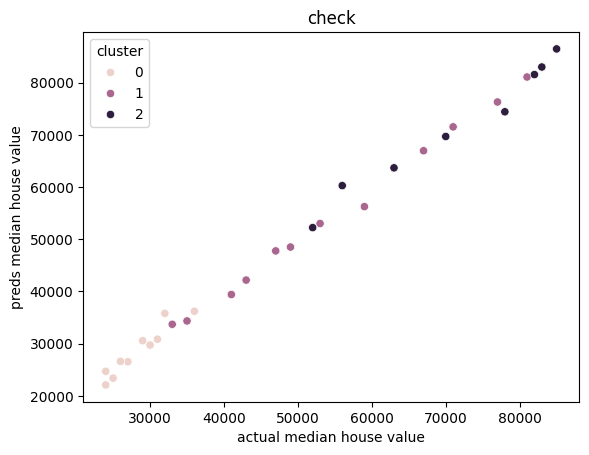

In [95]:
sns.scatterplot(x=y_train.reset_index(drop=True),y=train_preds,hue=x_train_ss['cluster'])
plt.xlabel('actual median house value')
plt.ylabel('preds median house value')
plt.title('check')
print(f'root_mean_squared_error : {round(root_mean_squared_error(y_train, train_preds),2)}')
print(f'mean_squared_error : {round(mean_squared_error(y_train, train_preds),2)}')
print(f'mean_absolute_errorr : {round(mean_absolute_error(y_train, train_preds),2)}')
print(f'r2_score : {round(r2_score(y_train, train_preds),2)}')
# Index karışırsa, model doğru olsa bile sonuç yanlış görünür.

root_mean_squared_error : 8109.9
mean_squared_error : 65770463.28
mean_absolute_errorr : 7130.33
r2_score : 0.76


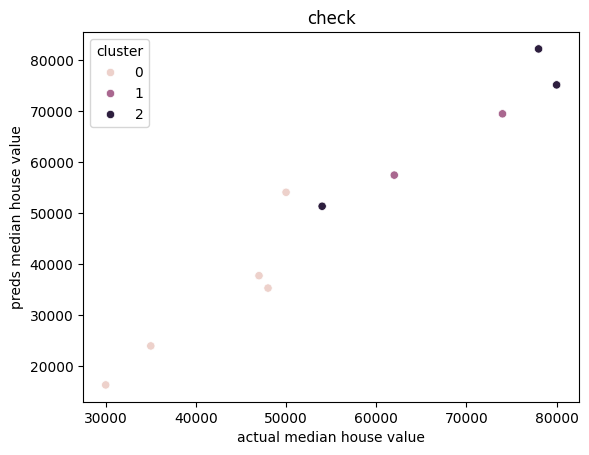

In [96]:
sns.scatterplot(x=y_test.reset_index(drop=True),y=test_preds,hue=x_test_ss['cluster'])
plt.xlabel('actual median house value')
plt.ylabel('preds median house value')
plt.title('check')
print(f'root_mean_squared_error : {round(root_mean_squared_error(y_test, test_preds),2)}')
print(f'mean_squared_error : {round(mean_squared_error(y_test, test_preds),2)}')
print(f'mean_absolute_errorr : {round(mean_absolute_error(y_test, test_preds),2)}')
print(f'r2_score : {round(r2_score(y_test, test_preds),2)}')
# Index karışırsa, model doğru olsa bile sonuç yanlış görünür.

In [97]:
temp_df = pd.DataFrame(linreg_model.coef_, linreg_model.feature_names_in_)

temp_df

,0
customer_id,198.362835
age,22429.670986
spending_score,1794.282902
website_visits,-8758.647340
avg_session_time,5867.418606
cluster,-314.893123
